In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from pandas import DataFrame
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
# количество признаков входного слоя
feature_count = 6

drop_column = ['№п/п', 'Основание поступления']
gender_dict = {'Мужской': 1,'Женский': 0}

# подготовленный датасет
data = []

df = pd.read_csv('data/input.csv', sep=',')
df.drop(drop_column, axis = 1, inplace = True)

# переводим пол в числовой формат, т. к. это будет один из признаков
df['Пол'].replace(gender_dict, inplace = True) 

# приводим баллы по ЕГЭ к диапозону от 0 до 1
df.astype({'Баллы ЕГЭ': 'float'}).dtypes

fios = df['ФИО'].unique()
subjects = df['Предметы ЕГЭ'].unique()
cities = df['Населенный пункт по прописке'].unique()
schools = df['Учебное заведение'].unique()
classes = df['Специальность/направление'].unique()

for el in fios:
    student = df[df['ФИО'] == el]
    features = np.zeros((feature_count))
    for i in range(len(subjects)):
        res = student.loc[student['Предметы ЕГЭ'] == subjects[i], 'Баллы ЕГЭ'].values
        features[i] = res[0] if len(res) else 0
    features[5] = student.iloc[0]['Пол']
    
    res = np.zeros((len(classes)))
    res[np.where(classes == student.iloc[0]['Специальность/направление'])[0].item(0)] = 1
    
    temp_data = dict(fio = el, features = features, result = res)
    
    data.append(temp_data)

In [73]:
# computer_science_classes = df.loc[df['Предметы ЕГЭ'] == 'Информатика и ИКТ', 'Специальность/направление'].unique()
# computer_science = []

# for student in data:
#     if classes[np.where(student['result'] == 1)[0][0]] in computer_science_classes:
#         computer_science.append(student)

In [80]:
# computer_science_classes = df.loc[df['Предметы ЕГЭ'] == 'Обществознание', 'Специальность/направление'].unique()
# computer_science = []

# for student in data:
#     if classes[np.where(student['result'] == 1)[0][0]] in computer_science_classes:
#         computer_science.append(student)

In [84]:
computer_science_classes = df.loc[df['Предметы ЕГЭ'] == 'Физика', 'Специальность/направление'].unique()
computer_science = []

for student in data:
    if classes[np.where(student['result'] == 1)[0][0]] in computer_science_classes:
        computer_science.append(student)

#computer_science_classes = df.loc[df['Предметы ЕГЭ'] == 'Физика', 'Специальность/направление'].unique()
#computer_science = []

# for student in data:
#     #if classes[np.where(student['result'] == 1)[0][0]] in computer_science_classes:
#         computer_science.append(student)

In [75]:
# data_computer_scince = np.array([['Направление', 'Информатика', 'Математика', 'Русский язык', 'Пол']])

# for student in computer_science:
#     data_computer_scince = np.append(data_computer_scince,
#                          [[np.where(student['result'] == 1)[0][0],
#                            student['features'][1], 
#                            student['features'][0], 
#                            student['features'][2], 
#                            student['features'][5]]],
#                          axis = 0)
    
# plot_data = pd.DataFrame(
#     data = data_computer_scince[1:,0:],
#     columns = data_computer_scince[0,0:])

In [76]:
# data_computer_scince = np.array([['Направление', 'Математика', 'Русский язык', 'Физика', 'Обществознание', 'Информатика и ИКТ', 'Пол']])
# #data_computer_scince = np.array([['Направление', 'Математика', 'Русский язык', 'Физика', 'Пол']])

# for student in computer_science:
#     data_computer_scince = np.append(data_computer_scince,
#                          [[np.where(student['result'] == 1)[0][0], 
#                            student['features'][0], 
#                            student['features'][2],
#                            student['features'][3],
#                            student['features'][4],
#                            student['features'][1],
#                            student['features'][5]]],
#                          axis = 0)
    
# plot_data = pd.DataFrame(
#     data = data_computer_scince[1:,0:],
#     columns = data_computer_scince[0,0:])

In [91]:
data_computer_scince = np.array([['Направление', 'Математика', 'Русский язык', 'Физика', 'Пол']])

for student in computer_science:
    data_computer_scince = np.append(data_computer_scince,
                         [[np.where(student['result'] == 1)[0][0], 
                           student['features'][0], 
                           student['features'][2],
                           student['features'][3],
                           student['features'][5]]],
                         axis = 0)
    
plot_data = pd.DataFrame(
    data = data_computer_scince[1:,0:],
    columns = data_computer_scince[0,0:])

In [92]:
computer_science[0]['features']
subjects

array(['Математика', 'Информатика и ИКТ', 'Русский язык', 'Физика',
       'Обществознание'], dtype=object)

In [93]:
# data_computer_scince = np.array([['Направление', 'Обществознание', 'Математика', 'Русский язык', 'Пол']])

# for student in computer_science:
#     data_computer_scince = np.append(data_computer_scince,
#                          [[np.where(student['result'] == 1)[0][0],
#                            student['features'][4], 
#                            student['features'][0], 
#                            student['features'][2], 
#                            student['features'][5]]],
#                          axis = 0)
    
# plot_data = pd.DataFrame(
#     data = data_computer_scince[1:,0:],
#     columns = data_computer_scince[0,0:])

In [94]:
plot_data

,Направление,Математика,Русский язык,Физика,Пол
0,2.0,56.0,62.0,64.0,1.0
1,5.0,44.0,71.0,39.0,0.0
2,6.0,45.0,48.0,49.0,1.0
3,8.0,68.0,62.0,48.0,1.0
4,6.0,45.0,83.0,42.0,1.0
...,...,...,...,...,...
228,10.0,50.0,91.0,58.0,1.0
229,2.0,45.0,65.0,44.0,1.0
230,6.0,50.0,62.0,47.0,1.0
231,5.0,50.0,50.0,44.0,1.0


In [49]:
# print('0 - ' + classes[0])
# print('3 - ' + classes[3])
# print('4 - ' + classes[4])

# sns.set(font_scale=1.5)
# plot = sns.pairplot(
#     plot_data[['Математика', 'Информатика', 'Русский язык', 'Пол', 'Направление']].astype(float), 
#     hue = 'Направление',
#     plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'},
#     height = 4)
# plot.savefig("студенты(зависимость признаков).png")

In [50]:
# print('0 - ' + classes[0])
# print('3 - ' + classes[3])
# print('4 - ' + classes[4])

# sns.set(font_scale=1.5)
# plot = sns.pairplot(
#     plot_data[['Математика', 'Обществознание', 'Русский язык', 'Пол', 'Направление']].astype(float), 
#     hue = 'Направление',
#     plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'},
#     height = 4)
# plot.savefig("студенты(зависимость признаков).png")

0 - Информатика и вычислительная техника
3 - Прикладная информатика (в экономике)
4 - Программная инженерия


/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/vkorneychuk/.local/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

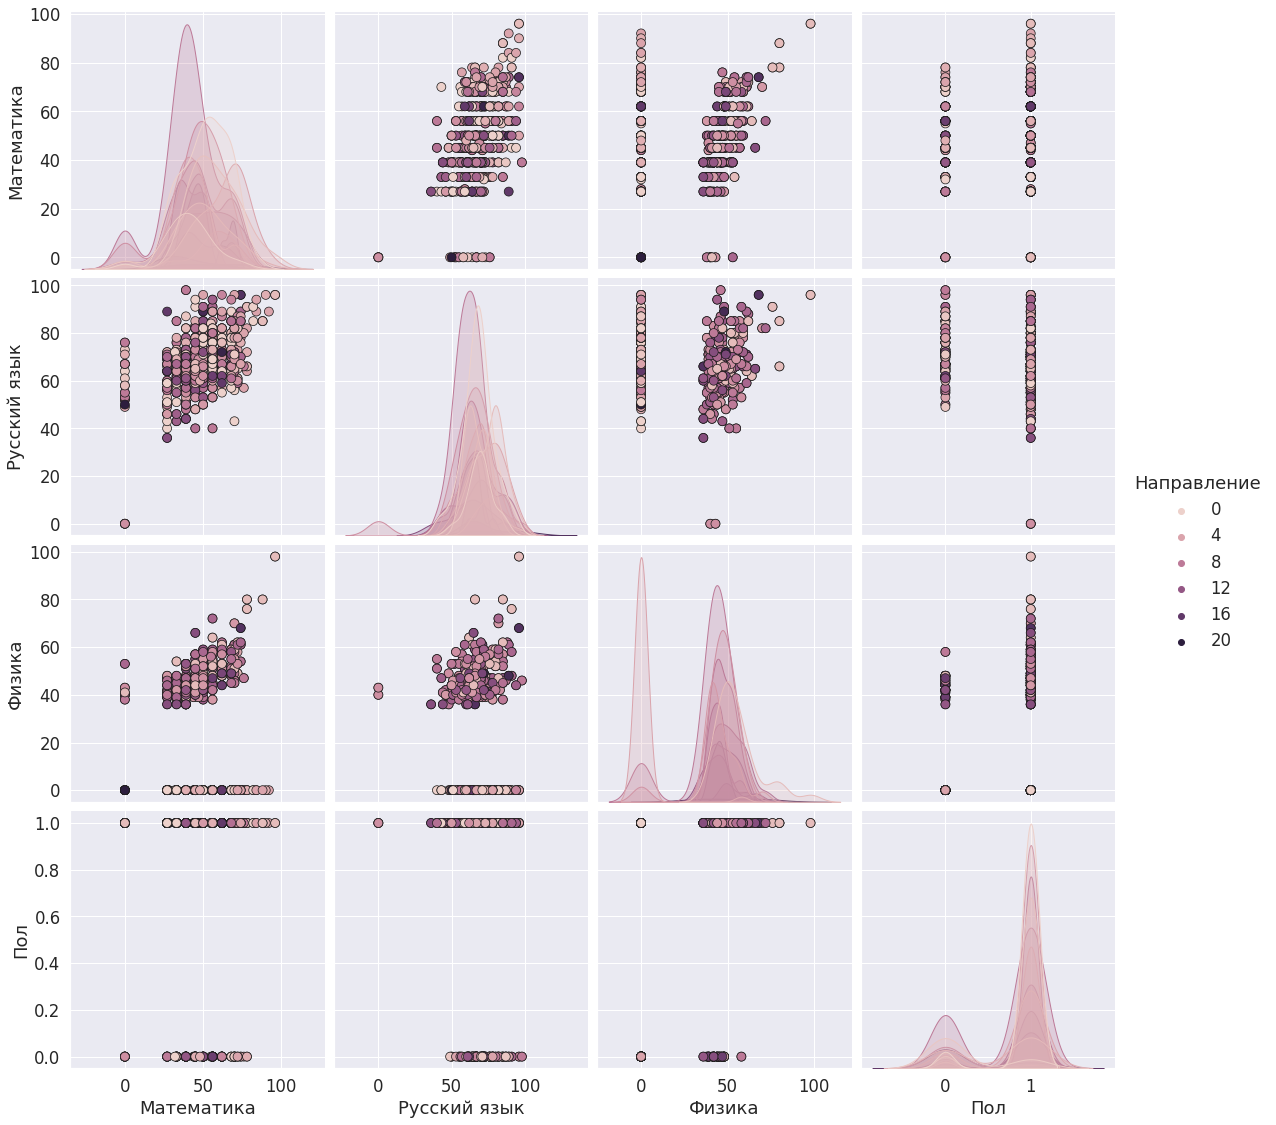

In [69]:
print('0 - ' + classes[0])
print('3 - ' + classes[3])
print('4 - ' + classes[4])

sns.set(font_scale=1.5)
plot = sns.pairplot(
    plot_data[['Математика', 'Русский язык', 'Физика', 'Пол', 'Направление']].astype(float), 
    hue = 'Направление',
    plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'},
    height = 4)
plot.savefig("студенты(зависимость признаков).png")

In [20]:
# plot_data[['Математика', 'Информатика', 'Русский язык', 'Пол']].astype(float).corr()

In [21]:
# plot_data[['Математика', 'Обществознание', 'Русский язык', 'Пол']].astype(float).corr()

,Математика,Обществознание,Русский язык,Пол
Математика,1.000000,0.499388,0.448970,-0.097131
Обществознание,0.499388,1.000000,0.290477,0.087438
Русский язык,0.448970,0.290477,1.000000,-0.031467
Пол,-0.097131,0.087438,-0.031467,1.000000


In [71]:
plot_data[['Математика', 'Русский язык', 'Физика', 'Обществознание', 'Информатика и ИКТ', 'Пол']].astype(float).corr()

,Математика,Русский язык,Физика,Обществознание,Информатика и ИКТ,Пол
Математика,1.000000,0.473826,0.092166,-0.026593,0.281381,0.051191
Русский язык,0.473826,1.000000,-0.045472,0.111146,0.167543,-0.155454
Физика,0.092166,-0.045472,1.000000,-0.356343,-0.716442,0.279021
Обществознание,-0.026593,0.111146,-0.356343,1.000000,-0.141768,-0.364554
Информатика и ИКТ,0.281381,0.167543,-0.716442,-0.141768,1.000000,0.023530
Пол,0.051191,-0.155454,0.279021,-0.364554,0.023530,1.000000


In [12]:
# corr = plot_data[['Математика', 'Информатика', 'Русский язык', 'Пол']].astype(float).corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

# sns.set(font_scale=1.5)
# plt.figure(figsize = (18,8))
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.9)
#     plt.savefig("студенты(корреляция признаков).png")

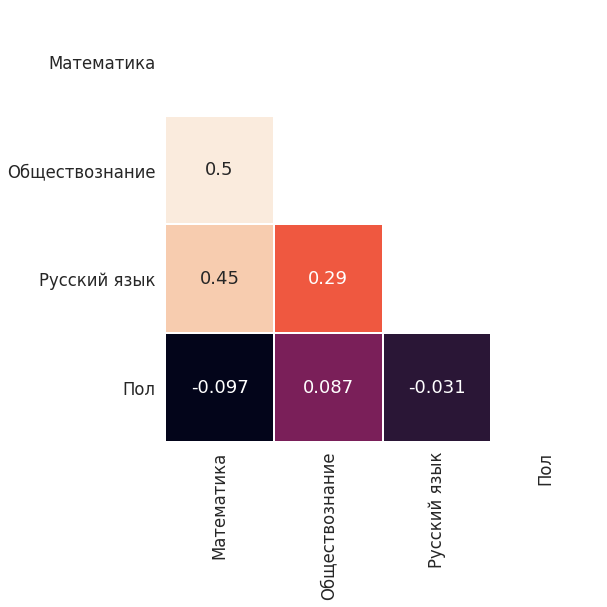

In [22]:
# corr = plot_data[['Математика', 'Обществознание', 'Русский язык', 'Пол']].astype(float).corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

# sns.set(font_scale=1.5)
# plt.figure(figsize = (18,8))
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.9)
#     plt.savefig("студенты(корреляция признаков).png")

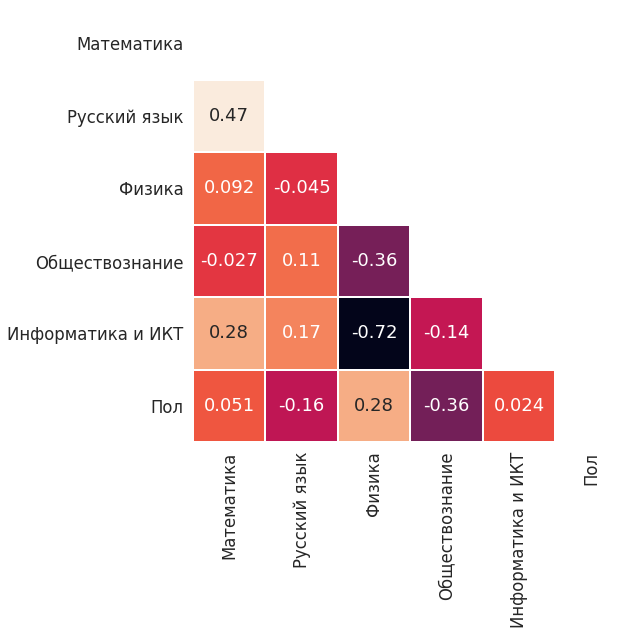

In [72]:
corr = plot_data[['Математика', 'Русский язык', 'Физика', 'Обществознание', 'Информатика и ИКТ', 'Пол']].astype(float).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.5)
plt.figure(figsize = (18,8))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.9)
    plt.savefig("студенты(корреляция признаков).png")